In [1]:
import Metropolis1D as m1d
import numpy as np
import matplotlib.pyplot as plt

In [52]:
"""Parameters"""
L = 100 #Lattice Size
J = 100.0 #Spin Coupling 
h = -10.0 #External Field 
nSteps = 1000 #The number of steps we use to simulate the lattice 


In [53]:
"""Initialize a lattice to a totally random (T=infinity) state"""
latt = m1d.Lattice(L,J,h)
#latt.randomize()
#latt.calcEnergy() #We initialize all the energy/magnetization/etc... state variables

In [54]:
"""Simulation"""
energy = np.zeros(nSteps) #arrays for time series of state varaibles
mag = np.zeros(nSteps)
accepts = np.zeros(nSteps) #time series of whether the flip is accepted or rejected at each step
state_timeseries = np.zeros(shape=(nSteps,L)) #a complete time-series record of the states

for i in np.arange(0,nSteps):
    energy[i] = latt.energyPerSite #fill the arrays, then update via the metropolis procedure 
    mag[i] = latt.magPerSite
    state_timeseries[i,:] = latt.spins[:]
    
    accepts[i] = latt.metropolis() 

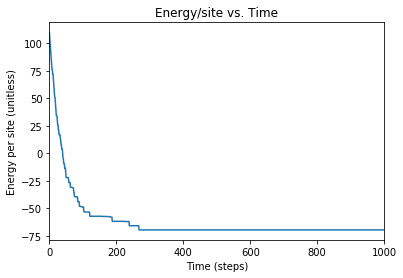

In [55]:
"""Plots"""
plt.plot(energy)

plt.xlim(0,nSteps)

plt.title("Energy/site vs. Time")
plt.xlabel("Time (steps)")
plt.ylabel("Energy per site (unitless)")
#plt.text(nSteps/2,-.2,"L=%s\nJ=%s\nh=%s"%(L,J,h))

plt.show()

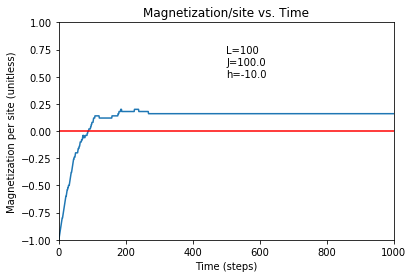

In [56]:
"""Plots"""
plt.plot(mag)
plt.axhline(color="red")

plt.ylim(-1.0,1.0)
plt.xlim(0,nSteps)

plt.title("Magnetization/site vs. Time")
plt.xlabel("Time (steps)")
plt.ylabel("Magnetization per site (unitless)")
plt.text(nSteps/2,.5,"L=%s\nJ=%s\nh=%s"%(L,J,h))

plt.show()

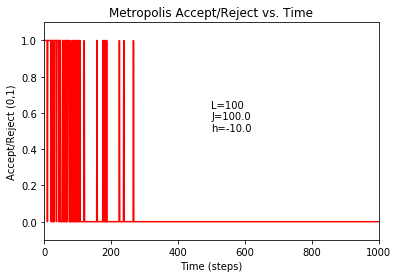

In [57]:
"""Plots"""
plt.plot(accepts,color="red")

plt.ylim(-0.1,1.1)
plt.xlim(0,nSteps)

plt.title("Metropolis Accept/Reject vs. Time")
plt.xlabel("Time (steps)")
plt.ylabel("Accept/Reject (0,1)")
plt.text(nSteps/2,.5,"L=%s\nJ=%s\nh=%s"%(L,J,h))

plt.show()

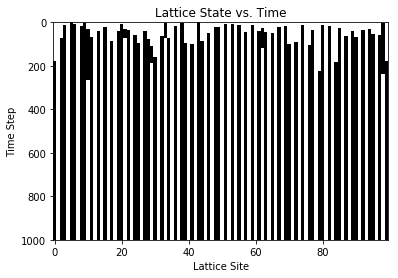

In [58]:
"""Plots"""
image = np.zeros(shape=(nSteps,L,3))
image[state_timeseries==1] = [0,0,0]
image[state_timeseries==0] = [1,1,1]

plt.imshow(image,interpolation="nearest",aspect="auto")

plt.title("Lattice State vs. Time")
plt.xlabel("Lattice Site")
plt.ylabel("Time Step")

plt.show()